Alunos:
  - Fabiane Sorbar
  - Vinicius Tessele   


---
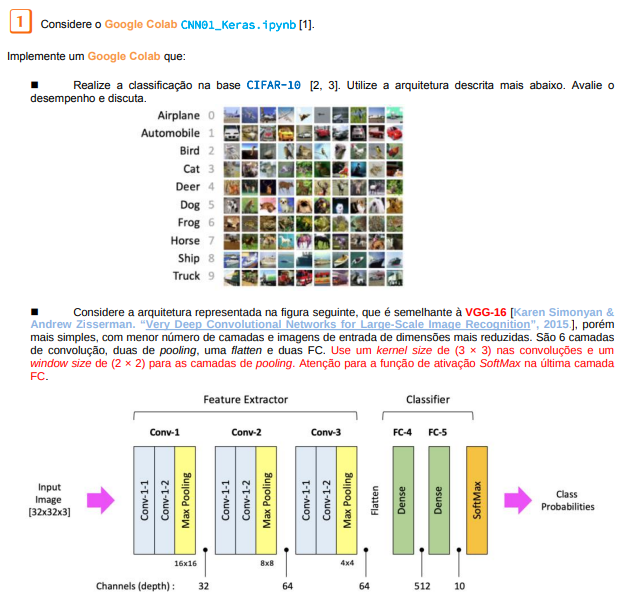

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
def criarModelo(input_shape=(32, 32, 3), num_classes=10):
    global model
    kernel = (3, 3)
    pool = (2, 2)

    model = keras.models.Sequential([
        keras.Input(shape=input_shape),

        # Conv Block 1
        keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
        keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=pool),  # Apenas 1ª pooling

        # Conv Block 2
        keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
        keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=pool),  # 2ª e última pooling

        # Conv Block 3
        keras.layers.Conv2D(128, kernel, padding='same', activation='relu'),
        keras.layers.Conv2D(128, kernel, padding='same', activation='relu'),

        # Classifier
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),   # FC-4
        keras.layers.Dense(num_classes, activation='softmax')  # FC-5
    ])

def treinar(numEpocas):
  history = model.fit(x_train, y_train,
                      epochs=numEpocas,
                      batch_size=64,
                      validation_split=0.2)
  return history


def compilarModelo(otimizador):
  model.compile(optimizer= otimizador,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


def plotarMatrizDeConfusao(nome, X_novos, y_novos, class_names):
  print(f'Gerando matriz de confusão {nome}...\n')

  y_proba = model.predict(X_novos)
  y_pred = np.argmax(y_proba, axis=1)

  matriz_confusao = confusion_matrix(y_novos, y_pred)

  plt.figure(figsize=(10, 8))
  sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Classe Predita')
  plt.ylabel('Classe Verdadeira')
  plt.title(f'Matriz de Confusão - {nome}')
  plt.tight_layout()
  plt.show()
  return

def plotarCurvaDeAcuracia(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()
  return

def avaliarConjuntoTestesDesconhecido(nome_modelo):
  resultado = model.evaluate(x_test, y_test)
  print(f"{nome_modelo} - Loss: {resultado[0]:.4f}, Acurácia: {resultado[1]:.4f}")
  return resultado

Class name of first instance: frog


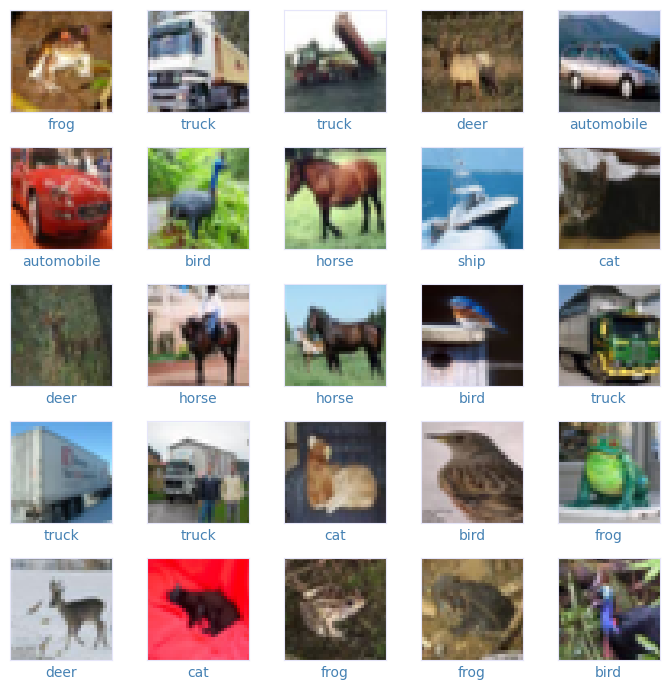

In [13]:
print(f'Class name of first instance: {class_names[np.argmax(y_train[0])]}')
plt.rc('axes', edgecolor='lavender')
fig = plt.figure(figsize=(7, 7))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])], color='steelblue')

plt.tight_layout()
plt.show()

Dataset shape: (50000, 32, 32, 3)
First instance shape: (32, 32, 3)

First instance:
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.

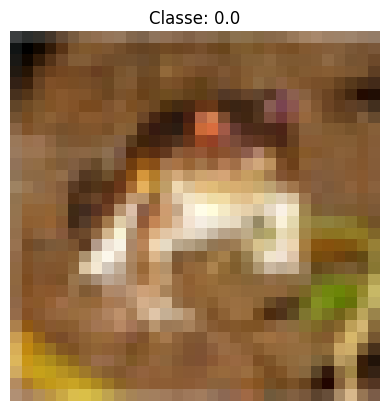

In [14]:
print(f'Dataset shape: {x_train.shape}')
print(f'First instance shape: {x_train[0].shape}')
print(f'\nFirst instance:\n {x_train[0]}')

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(f"Classe: {y_train[0][0]}")
plt.axis('off')
plt.show()

In [15]:
optimizers = {
    "sgd": keras.optimizers.SGD(),
    "adam": keras.optimizers.Adam(),
    "rmsprop": keras.optimizers.RMSprop(),
    "nadam": keras.optimizers.Nadam()
}

model_builders = {
    "Base": criarModelo,
}

results = []

for model_name, build_fn in model_builders.items():
    for opt_name, opt in optimizers.items():
        print(f"\n🚧 Treinando Modelo '{model_name}' com Otimizador '{opt_name.upper()}'")
        build_fn()
        compilarModelo(opt_name)

        history = treinar(30)
        loss, acc = avaliarConjuntoTestesDesconhecido(f"{model_name} + {opt_name.upper()}")

        results.append({
            "Modelo": model_name,
            "Otimizador": opt_name.upper(),
            "Loss final": loss,
            "Acurácia final": acc,
            "Histórico": history
        })


🚧 Treinando Modelo 'Base' com Otimizador 'SGD'
Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1552 - loss: 2.2523 - val_accuracy: 0.2754 - val_loss: 1.9949
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3209 - loss: 1.9026 - val_accuracy: 0.3529 - val_loss: 1.8219
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3970 - loss: 1.6963 - val_accuracy: 0.4444 - val_loss: 1.5643
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4535 - loss: 1.5355 - val_accuracy: 0.4669 - val_loss: 1.4979
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4877 - loss: 1.4347 - val_accuracy: 0.4957 - val_loss: 1.4169
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5145 - loss: 1.3655 - val_accuracy: 0.5274 - val_loss: 1.3461
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5546 - loss: 1.2788 - val_accuracy: 0.5440 - val_loss: 1.2911
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - a


📊 Comparativo de Acurácia Final:
  Modelo Otimizador  Loss final  Acurácia final
1   Base       ADAM    1.983019          0.7333
3   Base      NADAM    2.382839          0.7080
2   Base    RMSPROP    3.329285          0.6993
0   Base        SGD    2.793718          0.6195


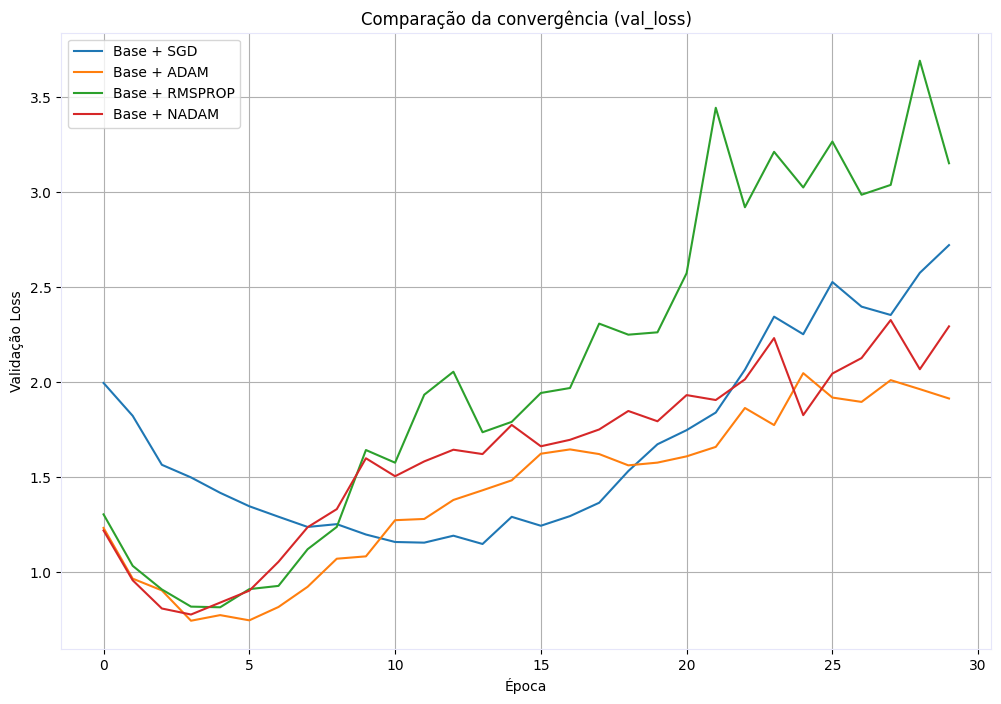

In [16]:
df_resultados = pd.DataFrame(results).drop(columns=['Histórico'])
print("\n📊 Comparativo de Acurácia Final:")
print(df_resultados.sort_values(by="Acurácia final", ascending=False))

# Plot da validação loss
plt.figure(figsize=(12, 8))
for r in results:
    label = f"{r['Modelo']} + {r['Otimizador']}"
    plt.plot(r["Histórico"].history["val_loss"], label=label)
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()

# **Teste com 30 épocas**

Adam teve o melhor desempenho, com maior acurácia e menor perda (loss).

Nadam ficou próximo de Adam, mas com perda mais alta.

RMSProp teve desempenho razoável, mas com maior instabilidade no loss.

SGD foi o menos eficiente, apresentando a menor acurácia.

**O otimizador Adam é o mais indicado para esse modelo CNN com CIFAR-10, oferecendo o melhor equilíbrio entre velocidade de convergência e desempenho final.**

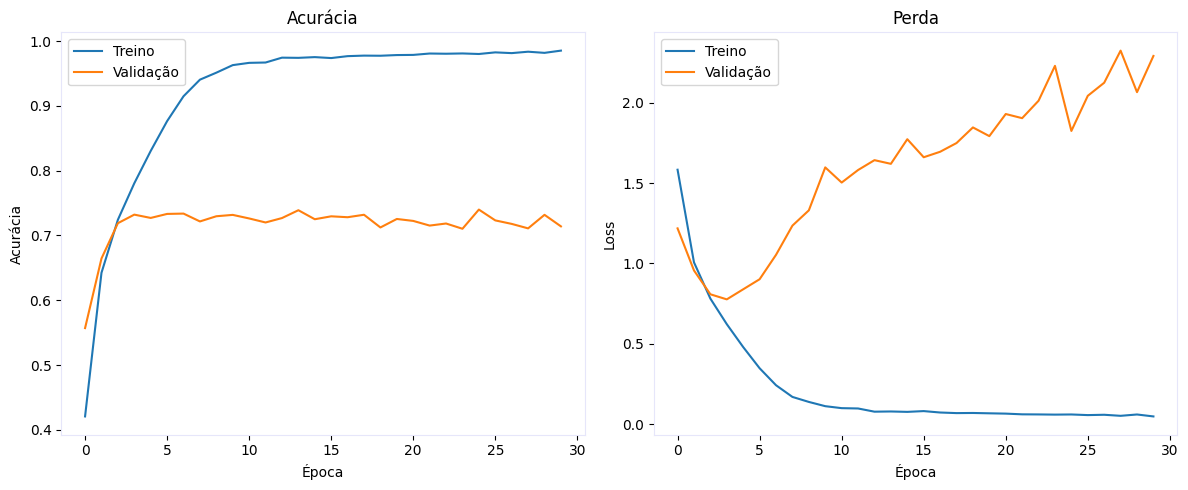

In [17]:
# Plotar acurácia e perda
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
optimizers = {
    "sgd": keras.optimizers.SGD(),
    "adam": keras.optimizers.Adam(),
    "rmsprop": keras.optimizers.RMSprop(),
    "nadam": keras.optimizers.Nadam()
}

model_builders = {
    "Base": criarModelo,
}

results = []

for model_name, build_fn in model_builders.items():
    for opt_name, opt in optimizers.items():
        print(f"\n🚧 Treinando Modelo '{model_name}' com Otimizador '{opt_name.upper()}'")
        build_fn()
        compilarModelo(opt_name)

        history = treinar(60)
        loss, acc = avaliarConjuntoTestesDesconhecido(f"{model_name} + {opt_name.upper()}")

        results.append({
            "Modelo": model_name,
            "Otimizador": opt_name.upper(),
            "Loss final": loss,
            "Acurácia final": acc,
            "Histórico": history
        })


🚧 Treinando Modelo 'Base' com Otimizador 'SGD'
Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1401 - loss: 2.2824 - val_accuracy: 0.2768 - val_loss: 2.0074
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2878 - loss: 1.9759 - val_accuracy: 0.3575 - val_loss: 1.8158
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3795 - loss: 1.7427 - val_accuracy: 0.4239 - val_loss: 1.6152
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4375 - loss: 1.5790 - val_accuracy: 0.4721 - val_loss: 1.5001
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4794 - loss: 1.4697 - val_accuracy: 0.4887 - val_loss: 1.4773
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5158 - loss: 1.3763 - val_accuracy: 0.4964 - val_loss: 1.4212
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5374 - loss: 1.3041 - val_accuracy: 0.5420 - val_loss: 1.2925
Epoch 8/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - a


📊 Comparativo de Acurácia Final:
  Modelo Otimizador  Loss final  Acurácia final
3   Base      NADAM    2.832446          0.7269
2   Base    RMSPROP    8.910622          0.7256
1   Base       ADAM    2.866351          0.7251
0   Base        SGD    4.012460          0.6342


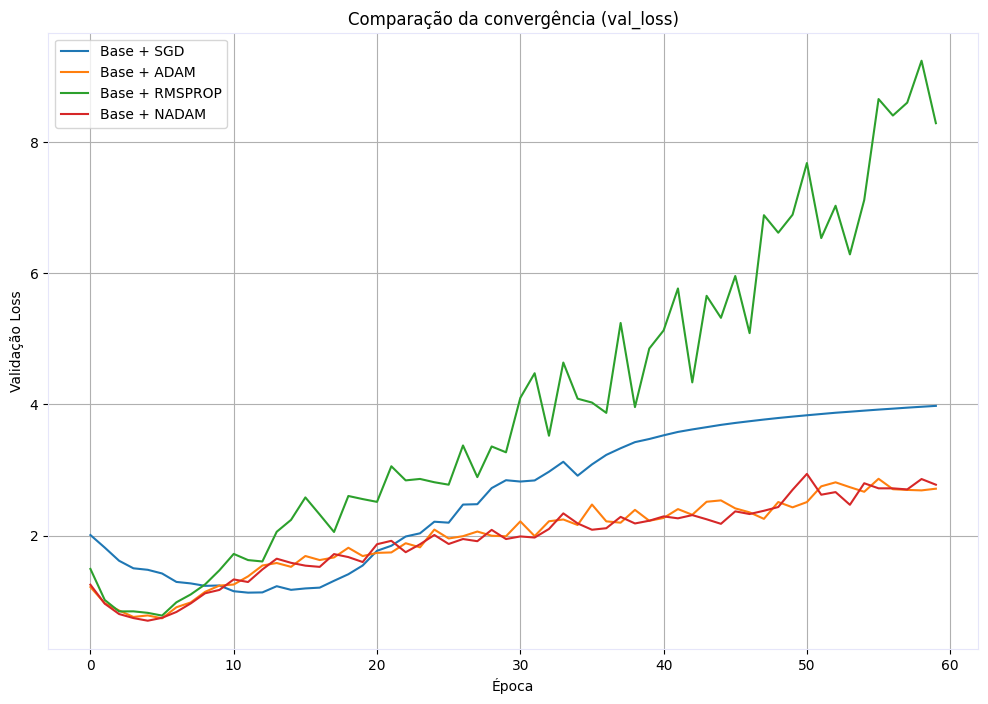

In [19]:
df_resultados = pd.DataFrame(results).drop(columns=['Histórico'])
print("\n📊 Comparativo de Acurácia Final:")
print(df_resultados.sort_values(by="Acurácia final", ascending=False))

# Plot da validação loss
plt.figure(figsize=(12, 8))
for r in results:
    label = f"{r['Modelo']} + {r['Otimizador']}"
    plt.plot(r["Histórico"].history["val_loss"], label=label)
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()


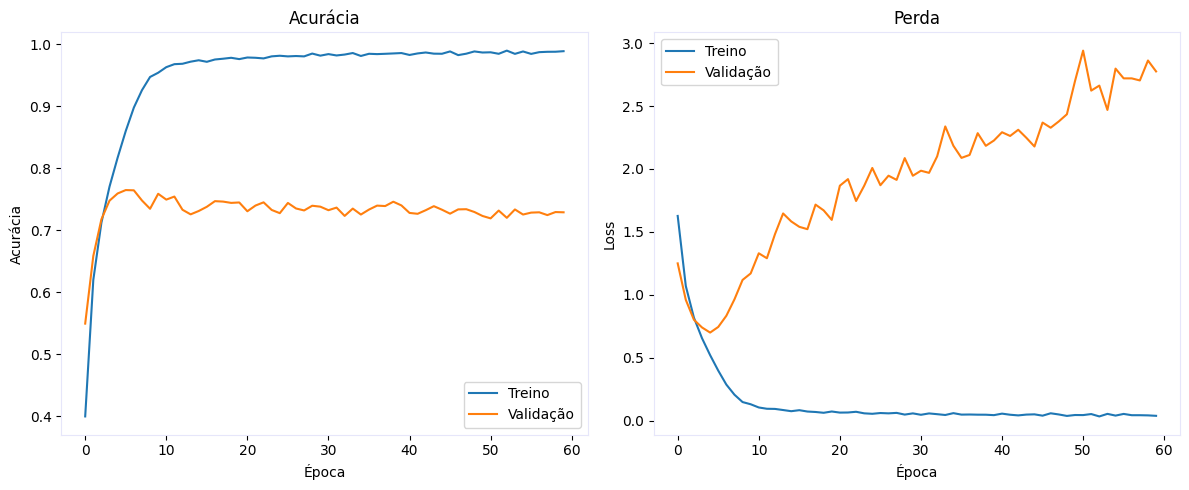

In [20]:
# Plotar acurácia e perda
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Teste com 60 épocas**
Nadam teve a melhor acurácia, superando Adam e RMSProp por pequena margem.

RMSProp apresentou acurácia próxima ao topo, mas com loss final muito alto, indicando instabilidade ou overfitting.

Adam manteve boa performance, embora ligeiramente abaixo de Nadam.

SGD continua com desempenho inferior, tanto em loss quanto em acurácia.

# 📊 Comparativo de Acurácia Final — 30 vs 60 Épocas

| 🔧 Otimizador | ⏱ Épocas | ❌ Loss Final | ✅ Acurácia Final |
| ------------- | -------- | ------------ | ---------------- |
| **Adam**      | 30       | 1.9830       | 0.7333           |
|               | 60       | 2.8664       | 0.7251 ⬇️        |
| **Nadam**     | 30       | 2.3828       | 0.7080           |
|               | 60       | 2.8324       | 0.7269 ⬆️        |
| **RMSProp**   | 30       | 3.3293       | 0.6993           |
|               | 60       | 8.9106       | 0.7256 ⬆️        |
| **SGD**       | 30       | 2.7937       | 0.6195           |
|               | 60       | 4.0125       | 0.6342 ⬆️        |

**🔍 Análise:**

Nadam, RMSProp e SGD apresentaram melhora de acurácia com 60 épocas.

Adam teve ligeira queda de acurácia, apesar de ter sido o melhor em 30 épocas.

RMSProp teve o pior comportamento de loss com 60 épocas, indicando possível overfitting.

Melhor acurácia geral foi com Adam em 30 épocas (73.33%).
